# CS311 Project 3: Adult Census Income Prediction
In this project, I try to implement several models to help predict the income of the test datasets. 

- Decision Tree
- Naive Bayes
- Nearest Neighbors Classifiers
- Support Vector Machines
- Ensemble Models
- Neural Networks

And try to compare the performance of these models to find the best one. 

## Data Preprocessing
First, we should load the data and check the missing values. The relevant fields are:

From `data/traindata.csv` and `data/testdata.csv`:

| Attribute | Description                                       | Type     | 
|-----------|---------------------------------------------------|----------|
| **age** | the working age of each data sample                | Numeric  | 
| **workclass** | type of work, where there are private, local government, etc. | Character |
| **fnlwgt** | the number of observational representatives of a sample in a state | Numeric |
| **education** | the level of education of each sample  | Character |
| **education_num** | the schooling year of each sample  | Numeric   |
| **marital_status** | marital status of each sample  | Character | 
| **occupation** | the occupation of each sample | Character |
| **relationship** | the family relationship of each sample | Character |
| **race** | the race of each sample | Character |
| **gender** | the sex of each sample | Character |
| **capital_gain** | a capital gain is a profit that results from a disposition of a capital asset, such as stock, bond or real estate, where the amount realised on the disposition exceeds the purchase price | Numeric |
| **capital_loss** | capital loss is the difference between a lower selling price and a higher purchase price, resulting in a financial loss for each sample | Numeric |
| **hours_per_week** | sample weekly working hours | Numeric |
| **native_country** | the country where the sample is from | Character |

From `data/trainlabel.txt`:
| Attribute | Description                                       | Type     | 
|-----------|---------------------------------------------------|----------|
| **income:** | income, where income is greater than 50K and less than or equal to 50K | Boolean |

The preprocessing process will do the following jobs:
- Load the data
- Categorize every attributes, and map each value to a numeric value
- Detect null or missing values (Some places use ? to represent unknow data)
- Normalize the data

In [11]:
import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# Use the given data set
train_data = pd.read_csv('data/traindata.csv') # Load the train data
train_label = pd.read_csv('data/trainlabel.txt', header=None, names=['label']) # Load the data label
test_data = pd.read_csv('data/testdata.csv') # Load the test data
test_label = pd.read_csv('data/testlabel.txt', header=None, names=['label']) # Load the test data label 

# Use split to split the data into training and validation sets
# from sklearn.model_selection import train_test_split
# data = pd.read_csv('data/adult.csv')
# X = data.drop('income', axis=1)
# Y = data['income']
# train_data, test_data, train_label, test_label = train_test_split(X, Y, test_size=0.2, random_state=42)


After printing the values, we can categorize each attributes. 


| workclass | assigned values |
|-----------|-----------------|
| Local-gov |               1 |
| Self-emp-inc |            2 |
| Self-emp-not-inc |        3 |
| Private |                 4 |
| State-gov |               5 |
| Federal-gov |             6 |
| Never-worked |            7 |
| Without-pay |             8 |
| ? |                       0 |

The workclass attribute has 9 unique values, and we map them to 9 different values.

| education | assigned values |
|-----------|-----------------|
| Preschool |               1 |
| 1st-4th |                 2 |
| 5th-6th |                 3 |
| 7th-8th |                 4 |
| 9th |                     5 |
| 10th |                    6 |
| 11th |                    7 |
| 12th |                    8 |
| HS-grad |                 9 |
| Some-college |           10 |
| Assoc-voc |              11 |
| Assoc-acdm |             12 |
| Bachelors |              13 |
| Masters |                14 |
| Prof-school |            15 |
| Doctorate |              16 |

The education attribute has 16 unique values, and we map them to 16 different values.

| marital_status | assigned values |
|----------------|-----------------|
| Never-married |                1 |
| Married-civ-spouse |           2 |
| Married-AF-spouse |            3 |
| Married-spouse-absent |        4 |
| Separated |                    5 |
| Divorced |                     6 |
| Widowed |                      7 |

The marital_status attribute has 7 unique values, and we map them to 7 different values.

| occupation | assigned values |
|------------|-----------------|
| Adm-clerical |             1 |
| Craft-repair |             2 |
| Transport-moving |         3 |
| Sales |                    4 |
| Handlers-cleaners |        5 |
| Prof-specialty |           6 |
| Machine-op-inspct |        7 |
| Tech-support |             8 |
| Exec-managerial |          9 |
| Farming-fishing |         10 |
| Protective-serv |         11 |
| Priv-house-serv |         12 |
| Armed-Forces |            13 |
| Other-service |           14 |
| ? |                        0 |

The occupation attribute has 14 unique values, and we map them to 14 different values.

| relationship | assigned values |
|--------------|-----------------|
| Unmarried |                  1 |
| Not-in-family |              2 |
| Husband |                    3 |
| Wife |                       4 |
| Own-child |                  5 |
| Other-relative |             6 |

The relationship attribute has 6 unique values, and we map them to 6 different values

| race | assigned values |
|------|-----------------|
| White |              1 |
| Asian-Pac-Islander | 2 |
| Black |              3 |
| Amer-Indian-Eskimo | 4 |
| Other |              5 |

The race attribute has 5 unique values, and we map them to 5 different

| sex | assigned values |
|-----|-----------------|
| Male |              0 |
| Female |            1 |

The sex attribute has 2 unique values, and we map them to 2 different values

| native_country        | assigned values |
|-----------------------|-----------------|
| ?                     | 0               |
| Cambodia              | 1               |
| Canada                | 2               |
| China                 | 3               |
| Columbia              | 4               |
| Cuba                  | 5               |
| Dominican-Republic    | 6               |
| Ecuador               | 7               |
| El-Salvador           | 8               |
| England               | 9               |
| France                | 10              |
| Germany               | 11              |
| Greece                | 12              |
| Guatemala             | 13              |
| Haiti                 | 14              |
| Holand-Netherlands    | 15              |
| Honduras              | 16              |
| Hong                  | 17              |
| Hungary               | 18              |
| India                 | 19              |
| Iran                  | 20              |
| Ireland               | 21              |
| Italy                 | 22              |
| Jamaica               | 23              |
| Japan                 | 24              |
| Laos                  | 25              |
| Mexico                | 26              |
| Nicaragua             | 27              |
| Outlying-US(Guam-USVI-etc) | 28         |
| Peru                  | 29              |
| Philippines           | 30              |
| Poland                | 31              |
| Portugal              | 32              |
| Puerto-Rico           | 33              |
| Scotland              | 34              |
| South                 | 35              |
| Taiwan                | 36              |
| Thailand              | 37              |
| Trinadad&Tobago       | 38              |
| United-States         | 39              |
| Vietnam               | 40              |
| Yugoslavia            | 41              |

In [12]:
# Based on the above assign values, we can map each attribute to a number
# Workclass 
train_data['workclass'] = train_data['workclass'].map({
    'Local-gov': 1,
    'Self-emp-inc': 2,
    'Self-emp-not-inc': 3,
    'Private': 4,
    'State-gov': 5,
    'Federal-gov': 6,
    'Never-worked': 7,
    'Without-pay': 8,
    '?': 0
})
test_data['workclass'] = test_data['workclass'].map({
    'Local-gov': 1,
    'Self-emp-inc': 2,
    'Self-emp-not-inc': 3,
    'Private': 4,
    'State-gov': 5,
    'Federal-gov': 6,
    'Never-worked': 7,
    'Without-pay': 8,
    '?': 0
})
# Education
train_data['education'] = train_data['education'].map({
    'Preschool': 1,
    '1st-4th': 2,
    '5th-6th': 3,
    '7th-8th': 4,
    '9th': 5,
    '10th': 6,
    '11th': 7,
    '12th': 8,
    'HS-grad': 9,
    'Some-college': 10,
    'Assoc-voc': 11,
    'Assoc-acdm': 12,
    'Bachelors': 13,
    'Masters': 14,
    'Prof-school': 15,
    'Doctorate': 16
})
test_data['education'] = test_data['education'].map({
    'Preschool': 1,
    '1st-4th': 2,
    '5th-6th': 3,
    '7th-8th': 4,
    '9th': 5,
    '10th': 6,
    '11th': 7,
    '12th': 8,
    'HS-grad': 9,
    'Some-college': 10,
    'Assoc-voc': 11,
    'Assoc-acdm': 12,
    'Bachelors': 13,
    'Masters': 14,
    'Prof-school': 15,
    'Doctorate': 16
})
# Marital Status
train_data['marital.status'] = train_data['marital.status'].map({
    'Never-married': 1,
    'Married-civ-spouse': 2,
    'Married-AF-spouse': 3,
    'Married-spouse-absent': 4,
    'Separated': 5,
    'Divorced': 6,
    'Widowed': 7
})
test_data['marital.status'] = test_data['marital.status'].map({
    'Never-married': 1,
    'Married-civ-spouse': 2,
    'Married-AF-spouse': 3,
    'Married-spouse-absent': 4,
    'Separated': 5,
    'Divorced': 6,
    'Widowed': 7
})
# Occupation
train_data['occupation'] = train_data['occupation'].map({
    'Adm-clerical': 1,
    'Craft-repair': 2,
    'Transport-moving': 3,
    'Sales': 4,
    'Handlers-cleaners': 5,
    'Prof-specialty': 6,
    'Machine-op-inspct': 7,
    'Tech-support': 8,
    'Exec-managerial': 9,
    'Farming-fishing': 10,
    'Protective-serv': 11,
    'Priv-house-serv': 12,
    'Armed-Forces': 13,
    'Other-service': 14,
    '?': 0
})
test_data['occupation'] = test_data['occupation'].map({
    'Adm-clerical': 1,
    'Craft-repair': 2,
    'Transport-moving': 3,
    'Sales': 4,
    'Handlers-cleaners': 5,
    'Prof-specialty': 6,
    'Machine-op-inspct': 7,
    'Tech-support': 8,
    'Exec-managerial': 9,
    'Farming-fishing': 10,
    'Protective-serv': 11,
    'Priv-house-serv': 12,
    'Armed-Forces': 13,
    'Other-service': 14,
    '?': 0
})
# Relationship
train_data['relationship'] = train_data['relationship'].map({
    'Unmarried': 1,
    'Not-in-family': 2,
    'Husband': 3,
    'Wife': 4,
    'Own-child': 5,
    'Other-relative': 6
})
test_data['relationship'] = test_data['relationship'].map({
    'Unmarried': 1,
    'Not-in-family': 2,
    'Husband': 3,
    'Wife': 4,
    'Own-child': 5,
    'Other-relative': 6
})
# Race 
train_data['race'] = train_data['race'].map({
    'White': 1,
    'Asian-Pac-Islander': 2,
    'Black': 3,
    'Amer-Indian-Eskimo': 4,
    'Other': 5
})
test_data['race'] = test_data['race'].map({
    'White': 1,
    'Asian-Pac-Islander': 2,
    'Black': 3,
    'Amer-Indian-Eskimo': 4,
    'Other': 5
})
# Sex
train_data['sex'] = train_data['sex'].map({
    'Male': 0,
    'Female': 1
})
test_data['sex'] = test_data['sex'].map({
    'Male': 0,
    'Female': 1
})
# Native Countries
train_data['native.country'] = train_data['native.country'].map({
    '?': 0,
    'Cambodia': 1,
    'Canada': 2,
    'China': 3,
    'Columbia': 4,
    'Cuba': 5,
    'Dominican-Republic': 6,
    'Ecuador': 7,
    'El-Salvador': 8,
    'England': 9,
    'France': 10,
    'Germany': 11,
    'Greece': 12,
    'Guatemala': 13,
    'Haiti': 14,
    'Holand-Netherlands': 15,
    'Honduras': 16,
    'Hong': 17,
    'Hungary': 18,
    'India': 19,
    'Iran': 20,
    'Ireland': 21,
    'Italy': 22,
    'Jamaica': 23,
    'Japan': 24,
    'Laos': 25,
    'Mexico': 26,
    'Nicaragua': 27,
    'Outlying-US(Guam-USVI-etc)': 28,
    'Peru': 29,
    'Philippines': 30,
    'Poland': 31,
    'Portugal': 32,
    'Puerto-Rico': 33,
    'Scotland': 34,
    'South': 35,
    'Taiwan': 36,
    'Thailand': 37,
    'Trinadad&Tobago': 38,
    'United-States': 39,
    'Vietnam': 40,
    'Yugoslavia': 41
})
test_data['native.country'] = test_data['native.country'].map({
    '?': 0,
    'Cambodia': 1,
    'Canada': 2,
    'China': 3,
    'Columbia': 4,
    'Cuba': 5,
    'Dominican-Republic': 6,
    'Ecuador': 7,
    'El-Salvador': 8,
    'England': 9,
    'France': 10,
    'Germany': 11,
    'Greece': 12,
    'Guatemala': 13,
    'Haiti': 14,
    'Holand-Netherlands': 15,
    'Honduras': 16,
    'Hong': 17,
    'Hungary': 18,
    'India': 19,
    'Iran': 20,
    'Ireland': 21,
    'Italy': 22,
    'Jamaica': 23,
    'Japan': 24,
    'Laos': 25,
    'Mexico': 26,
    'Nicaragua': 27,
    'Outlying-US(Guam-USVI-etc)': 28,
    'Peru': 29,
    'Philippines': 30,
    'Poland': 31,
    'Portugal': 32,
    'Puerto-Rico': 33,
    'Scotland': 34,
    'South': 35,
    'Taiwan': 36,
    'Thailand': 37,
    'Trinadad&Tobago': 38,
    'United-States': 39,
    'Vietnam': 40,
    'Yugoslavia': 41
})
# Labels
# train_label = train_label.map({
#     '<=50K': 0,
#     '>50K': 1
# })
# test_label = test_label.map({
#     '<=50K': 0,
#     '>50K': 1
# })

In [13]:
X_train = train_data.values
Y_train = train_label.values.flatten()
X_test = test_data.values
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_train_nn = scaler.fit_transform(X_train)
X_test_nn = scaler.transform(X_test)

## Decision Tree
The sklearn decision tree package only takes in numerical values, therefore we need to preprocess the data by mapping. The splitting criterion has three choices: `gini`, `entropy` and `log_loss`. Basically, the `gini` criterion is used to measure the impurity of the node, and the `entropy` criterion is used to measure the information gain of the node. The `log_loss` criterion is used to measure the logistic loss of the node. The output trends of using `entropy` and `log_loss` are nearly the same. The `gini` criterion is slightly better than the other two, which can reach its highest accuracy with a depth of 7. (The other requires a max depth of 10) However, for all of them, the accuracy will go down due to overfitting.

Accuracy: 0.8426
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7417
           1       0.76      0.51      0.61      2352

    accuracy                           0.84      9769
   macro avg       0.81      0.73      0.76      9769
weighted avg       0.83      0.84      0.83      9769

Axes(0.125,0.11;0.62x0.77)


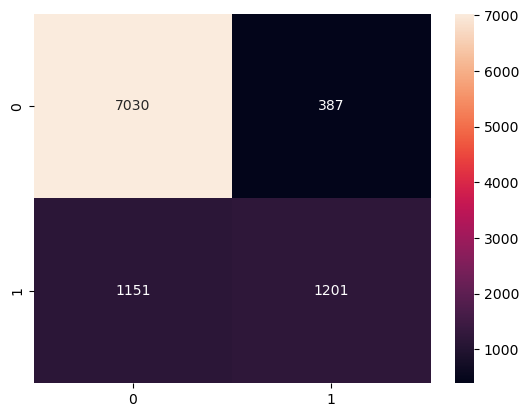

In [22]:
# Decision Tree
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
clf = tree.DecisionTreeClassifier(
    criterion='gini', 
    splitter='best', 
    max_depth=4
)
clf = clf.fit(X_train_nn, Y_train)
Y_test = clf.predict(X_test_nn)
accuracy = accuracy_score(test_label, Y_test)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(test_label, Y_test))
print(sns.heatmap(confusion_matrix(test_label, Y_test), annot=True, fmt='d'))

In [23]:
# Plot Decision Tree Structure
import graphviz
feature_names = train_data.columns.to_list()
target_names = ['<=50K', '>50K']
dot_data = tree.export_graphviz(clf, out_file=None, 
                           feature_names=feature_names,  
                           class_names=target_names,  
                           filled=True, rounded=True) 
graph = graphviz.Source(dot_data)
graph.render("ACI")

'ACI.pdf'

## Naive Bayes

| Feature                        | GaussianNB                                  | MultinomialNB                               | ComplementNB                                | BernoulliNB                                |
|-------------------------------|---------------------------------------------|---------------------------------------------|---------------------------------------------|---------------------------------------------|
| **Use Case**                   | Continuous data                             | Discrete count data (e.g., word counts)     | Imbalanced discrete count data              | Binary/Boolean features                     |
| **Assumption**                 | Features follow a Gaussian distribution     | Features follow a multinomial distribution  | Similar to MultinomialNB but for imbalanced data | Features are binary/Boolean                 |
| **Parameter Estimation**       | Mean and variance for each feature          | Feature probabilities based on counts       | Feature probabilities adjusted for imbalance | Feature probabilities for binary features   |
| **Common Applications**        | Sensor data, real-valued data               | Text classification                         | Text classification with class imbalance    | Text classification with binary features    |
| **Handling of Zero Counts**    | Not applicable                              | Smoothing (Laplace or other)                | Smoothing (Laplace or other)                | Smoothing (Laplace or other)                |
| **Performance**                | Fast, handles continuous data well          | Fast, effective for text data               | Better for imbalanced text data             | Fast, effective for binary features         |
| **Output**                     | Probability estimates                       | Probability estimates                       | Probability estimates                       | Probability estimates                       |
| **Pros**                       | Handles continuous data, simple and fast    | Effective for text classification           | Better performance with imbalanced data     | Simple and effective for binary data        |
| **Cons**                       | Assumes normal distribution of features     | Not suitable for continuous data            | More complex than MultinomialNB             | Not suitable for non-binary data            |

In [18]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
gnb = GaussianNB()
y_test_gnb = gnb.fit(X_train, Y_train).predict(X_test)
accuracy_gnb = accuracy_score(test_label, y_test_gnb)
print(f'Gaussian NB Accuracy: {accuracy_gnb:.4f}')

mtb = MultinomialNB()
y_test_mtb = mtb.fit(X_train, Y_train).predict(X_test)
accuracy_mtb = accuracy_score(test_label, y_test_mtb)
print(f'Multinomial NB Accuracy: {accuracy_mtb:.4f}')

cmb = ComplementNB()
y_test_cmb = cmb.fit(X_train, Y_train).predict(X_test)
accuracy_cmb = accuracy_score(test_label, y_test_cmb)
print(f'Complement NB Accuracy: {accuracy_cmb:.4f}')

bnb = BernoulliNB()
y_test_bnb = bnb.fit(X_train_nn, Y_train).predict(X_test_nn)
accuracy_bnb = accuracy_score(test_label, y_test_bnb)
print(f'Bernoulli NB Accuracy: {accuracy_bnb:.4f}')

Gaussian NB Accuracy: 0.7958
Multinomial NB Accuracy: 0.7833
Complement NB Accuracy: 0.7833
Bernoulli NB Accuracy: 0.8033


## Nearest Neighbor Classifiers
The key of using nearest neighbor classifiers is to find the best k value or the best radius. This will delineate the clustering boundaries. However, in the case of Radius Neighbors Classifier there are outliers if the radius are set too small. In this case, we can only label the outliers, and the radius size is dependent on whether the data is standardized. The KNeighbors Classifier is more stable than the Radius Neighbors Classifier, and the accuracy is higher after standardization.

In [7]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
# from sklearn.pipeline import Pipeline


In [8]:
knn = KNeighborsClassifier(
    n_neighbors=80, 
    weights='uniform', 
    algorithm='auto', 
    leaf_size=30, 
    p=2, 
    metric='minkowski', 
    metric_params=None, 
    n_jobs=None
)
knn.fit(X_train_nn, Y_train)
y_pred_knn = knn.predict(X_test_nn)

accuracy = accuracy_score(test_label, y_pred_knn)
print(f'KNN Accuracy: {accuracy:.4f}')

KNN Accuracy: 0.8330


In [14]:
print(X_train)
print(X_train_nn)

[[    77      1 177550 ...      0     14     39]
 [    40      2 475322 ...      0     50     39]
 [    29      3 341672 ...   1564     50     19]
 ...
 [    36      4 301614 ...      0     40     39]
 [    33      0 335625 ...      0     40     39]
 [    17      4 331552 ...      0     30     39]]
[[ 2.82150613 -1.97303461 -0.11476193 ... -0.21468948 -2.14867342
   0.29129778]
 [ 0.10887775 -1.19516526  2.70646888 ... -0.21468948  0.77521209
   0.29129778]
 [-0.69757933 -0.41729592  1.44020644 ...  3.6907932   0.77521209
  -2.25814503]
 ...
 [-0.18437937  0.36057343  1.06067827 ... -0.21468948 -0.03697833
   0.29129778]
 [-0.40432221 -2.75090395  1.38291435 ... -0.21468948 -0.03697833
   0.29129778]
 [-1.5773507   0.36057343  1.34432484 ... -0.21468948 -0.84916875
   0.29129778]]


In [37]:
rnc = RadiusNeighborsClassifier(
    radius=2.25, 
    weights='uniform', 
    algorithm='auto', 
    leaf_size=30, 
    p=2, 
    metric='minkowski', 
    outlier_label=-1, 
    metric_params=None, 
    n_jobs=None
)
rnc.fit(X_train_nn, Y_train)
y_pred_rnc = rnc.predict(X_test_nn)

accuracy = accuracy_score(test_label, y_pred_rnc)
print(f'Radius Neighbors Accuracy: {accuracy:.4f}')

Radius Neighbors Accuracy: 0.8106


## Support Vector Machines

In [7]:
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01, 0.001],
}
pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
grid_search = GridSearchCV(pipeline, param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train, Y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best estimator: ", grid_search.best_estimator_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...........................svc__C=0.1, svc__gamma=1; total time=  14.5s
[CV] END ...........................svc__C=0.1, svc__gamma=1; total time=  12.2s
[CV] END ...........................svc__C=0.1, svc__gamma=1; total time=  11.7s
[CV] END ...........................svc__C=0.1, svc__gamma=1; total time=  11.9s
[CV] END ...........................svc__C=0.1, svc__gamma=1; total time=  11.8s
[CV] END .........................svc__C=0.1, svc__gamma=0.1; total time=   4.0s
[CV] END .........................svc__C=0.1, svc__gamma=0.1; total time=   4.0s
[CV] END .........................svc__C=0.1, svc__gamma=0.1; total time=   4.1s
[CV] END .........................svc__C=0.1, svc__gamma=0.1; total time=   4.1s
[CV] END .........................svc__C=0.1, svc__gamma=0.1; total time=   4.0s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   4.2s
[CV] END ........................svc__C=0.1, svc

NameError: name 'accuracy_score' is not defined

In [8]:
from sklearn.metrics import accuracy_score
svc = SVC(
    C=grid_search.best_params_['svc__C'], 
    kernel='rbf', 
    degree=3, 
    gamma=grid_search.best_params_['svc__gamma'], 
    coef0=0.0, 
    shrinking=True, 
    probability=False, 
    tol=0.001, 
    cache_size=200, 
    class_weight=None
)
svc.fit(X_train, Y_train)
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(test_label, y_pred_svc)
print(f'SVC Accuracy: {accuracy_svc:.4f}')

SVC Accuracy: 0.7589


## Ensemble Model

SVC Accuracy: 0.8033
              precision    recall  f1-score   support

           0       0.80      1.00      0.88      7417
           1       0.95      0.19      0.32      2352

    accuracy                           0.80      9769
   macro avg       0.87      0.60      0.60      9769
weighted avg       0.83      0.80      0.75      9769

Axes(0.125,0.11;0.62x0.77)


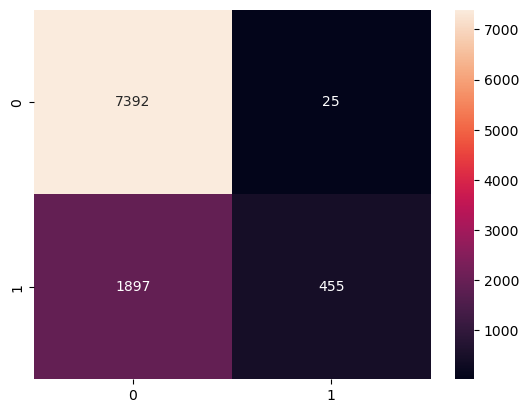

In [10]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
gbdt = HistGradientBoostingClassifier(
    min_samples_leaf=1,
    max_depth=2,
    learning_rate=1,
    max_iter=1
).fit(X_train_nn, Y_train)
y_pred_gdbt= gbdt.predict(X_test_nn)
accuracy_gbdt = accuracy_score(test_label, y_pred_gdbt)
print(f'SVC Accuracy: {accuracy_gbdt:.4f}')
print(classification_report(test_label, y_pred_gdbt))
print(sns.heatmap(confusion_matrix(test_label, y_pred_gdbt), annot=True, fmt='d'))

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(
    n_estimators=100, 
    learning_rate=1.0,
    max_depth=1, 
    random_state=0
).fit(X_train_nn, Y_train)
gbc.predict(X_test_nn)
accuracy_gbc = accuracy_score(test_label, y_pred_svc)
print(f'SVC Accuracy: {accuracy_gbc:.4f}')

SVC Accuracy: 0.7589


RFC Accuracy: 0.8569
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7417
           1       0.74      0.63      0.68      2352

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.86      0.85      9769

Axes(0.125,0.11;0.62x0.77)


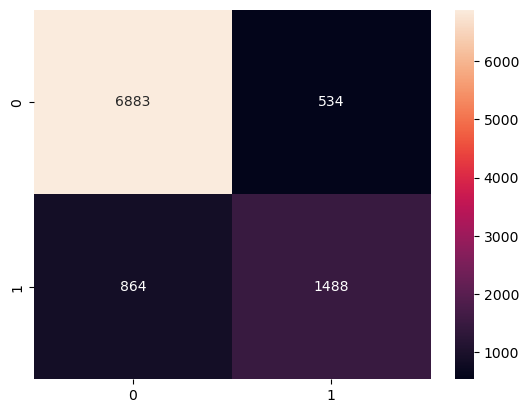

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
rfc = RandomForestClassifier().fit(X_train_nn, Y_train)
y_pred_rfc = rfc.predict(X_test_nn)
accuracy_rfc = accuracy_score(test_label, y_pred_rfc)
print(f'RFC Accuracy: {accuracy_rfc:.4f}')
print(classification_report(test_label, y_pred_rfc))
print(sns.heatmap(confusion_matrix(test_label, y_pred_rfc), annot=True, fmt='d'))


## Neural Networks
We are using the PyCaret to help us choose the according model. A typical workflow in Pycaret consist of the following steps:
- Setup
- Compare Models
- Analyze Model
- Predict
- Save Model

/Users/jaredan/miniconda3/envs/CS311_proj3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


RFC Accuracy: 0.8461
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7417
           1       0.73      0.57      0.64      2352

    accuracy                           0.85      9769
   macro avg       0.80      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769

Axes(0.125,0.11;0.62x0.77)


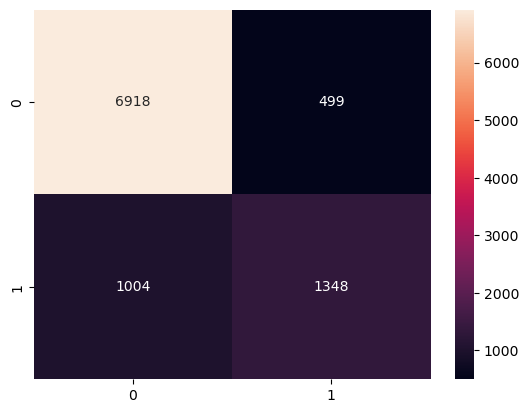

In [21]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(100,), 
    activation='relu', 
    solver='adam', 
    alpha=0.0001, 
    batch_size='auto', 
    learning_rate='constant', 
    learning_rate_init=0.001, 
    power_t=0.5, 
    max_iter=200, 
    shuffle=True, 
    random_state=None, 
    tol=0.0001, 
    verbose=False, 
    warm_start=False, 
    momentum=0.9, 
    nesterovs_momentum=True, 
    early_stopping=False, 
    validation_fraction=0.1, 
    beta_1=0.9, 
    beta_2=0.999, 
    epsilon=1e-08, 
    n_iter_no_change=10, 
    max_fun=15000
).fit(X_train_nn, Y_train)
y_pred_mlp = mlp.predict(X_test_nn)
accuracy_mlp = accuracy_score(test_label, y_pred_mlp)
print(f'MLP Accuracy: {accuracy_mlp:.4f}')
print(classification_report(test_label, y_pred_mlp))
print(sns.heatmap(confusion_matrix(test_label, y_pred_mlp), annot=True, fmt='d'))